Gerando gráficos úteis

In [ ]:
# Importa bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q022,Q024,Q025
0,2018,2,F,0.0,4,1,2,4,1.0,0,...,F,A,C,D,A,A,A,D,C,B
1,2018,3,F,0.0,4,1,1,1,1.0,0,...,B,A,B,B,A,A,B,B,A,A
2,2018,3,M,0.0,0,1,2,2,1.0,0,...,B,A,B,D,B,B,B,D,A,A
3,2018,2,F,0.0,3,1,2,4,1.0,0,...,I,A,B,D,A,A,B,D,A,B
4,2018,11,F,0.0,5,1,1,1,1.0,0,...,C,A,B,C,A,B,B,C,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191900,2023,12,M,1.0,1,1,1,1,NaN,0,...,F,A,B,D,B,B,B,E,A,B
27191901,2023,1,F,1.0,1,2,3,1,NaN,1,...,F,B,E,D,C,A,B,B,C,B
27191902,2023,3,F,1.0,3,1,2,2,1.0,0,...,B,A,B,C,A,A,B,B,A,B
27191903,2023,2,M,1.0,1,1,2,3,1.0,0,...,N,B,E,D,C,A,C,D,C,B


In [ ]:
# Carrega o dataset pkl
df = pd.read_pickle(r'C:\Users\szsou\Desktop\Projetos\Vídeos\ENEM\Projeto\microdados_enem_2018_2023.pkl')

In [4]:
# Cria a média das notas
df['NOTA_MEDIA'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1)

In [6]:
# Dropa TP_ESCOLA == 1 ou 4
df = df[~df['TP_ESCOLA'].isin([1, 4])]

In [7]:
# Renomeia os valores de TP_ESCOLA
df['TP_ESCOLA'] = df['TP_ESCOLA'].replace({2: 'Pública', 3: 'Privada'})

C:\Users\szsou\AppData\Local\Temp\ipykernel_14928\3572029852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_ESCOLA'] = df['TP_ESCOLA'].replace({2: 'Pública', 3: 'Privada'})


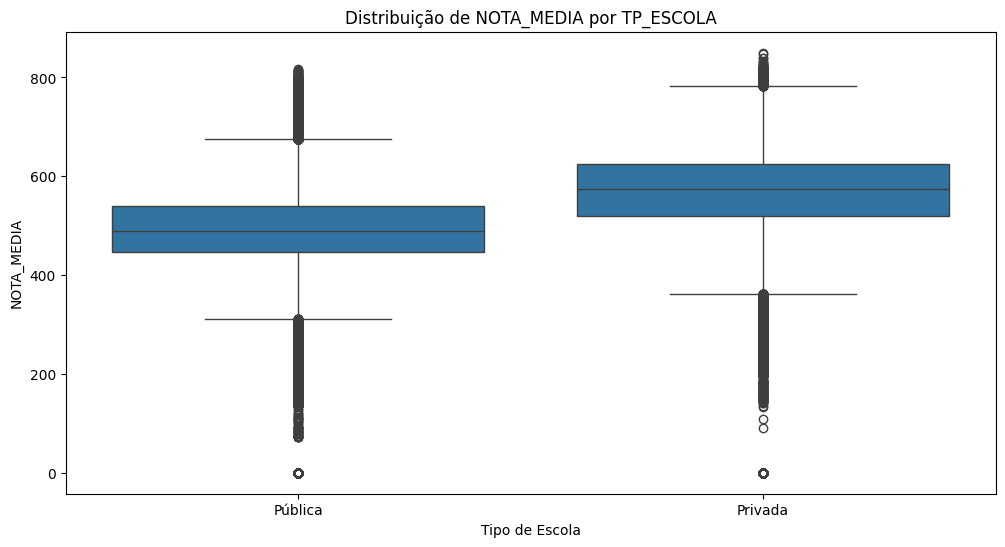

In [8]:
# Distribuição de NOTA_MEDIA por TP_ESCOLA
plt.figure(figsize=(12, 6))
sns.boxplot(x='TP_ESCOLA', y='NOTA_MEDIA', data=df)
plt.title('Distribuição de NOTA_MEDIA por TP_ESCOLA')
plt.xlabel('Tipo de Escola')
plt.ylabel('NOTA_MEDIA')
plt.show()

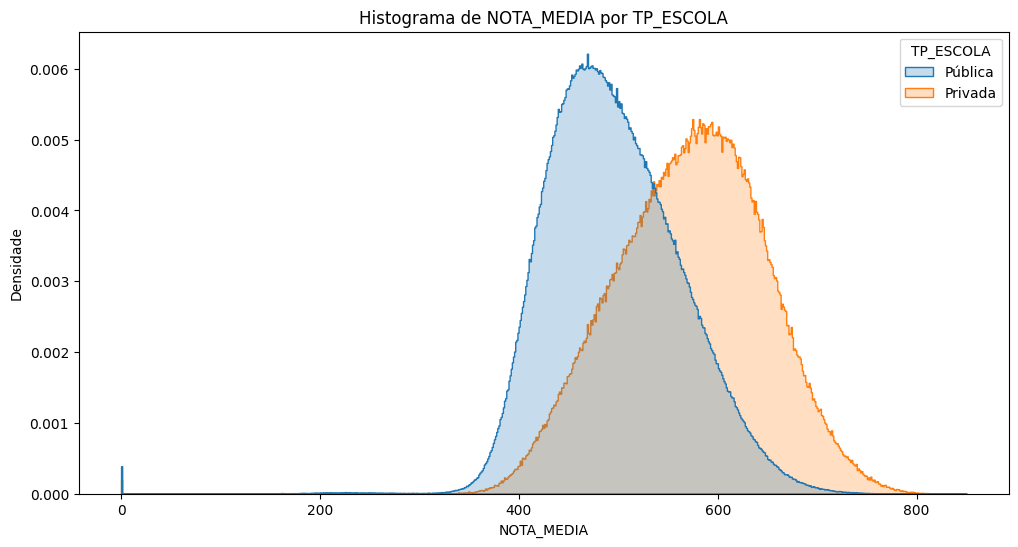

In [9]:
# Histograma de NOTA_MEDIA por TP_ESCOLA
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='NOTA_MEDIA', hue='TP_ESCOLA', element='step', stat='density', common_norm=False)
plt.title('Histograma de NOTA_MEDIA por TP_ESCOLA')
plt.xlabel('NOTA_MEDIA')
plt.ylabel('Densidade')
plt.show()

In [10]:
# Cria df auxiliar que só contem TP_COR_RACA == 1 ou 2
df_raca = df[df['TP_COR_RACA'].isin([1, 2])]
# Renomeia os valores de TP_COR_RACA
df_raca['TP_COR_RACA'] = df_raca['TP_COR_RACA'].replace({1: 'Branca', 2: 'Preta'})

C:\Users\szsou\AppData\Local\Temp\ipykernel_14928\3267105131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raca['TP_COR_RACA'] = df_raca['TP_COR_RACA'].replace({1: 'Branca', 2: 'Preta'})


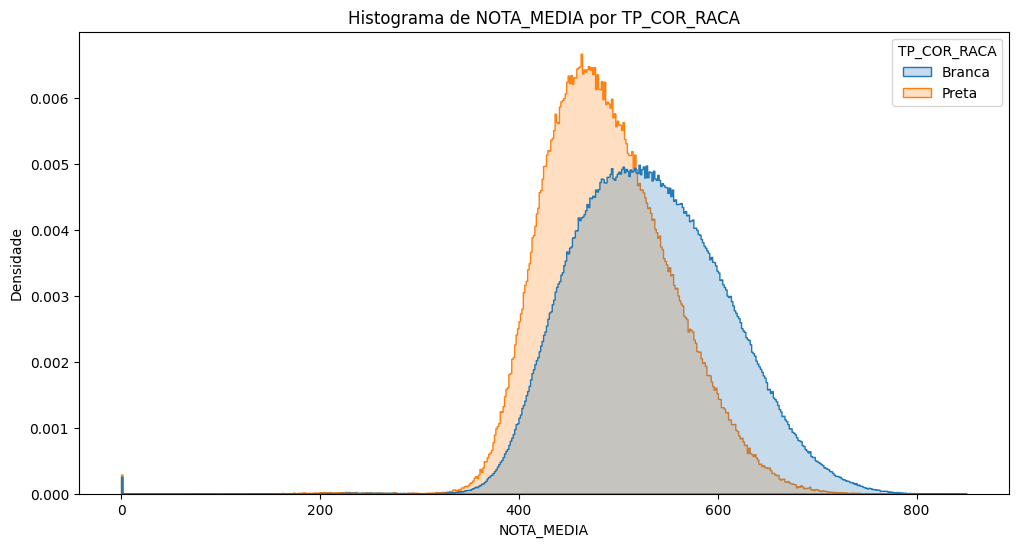

In [11]:
# Histograma de NOTA_MEDIA por TP_COR_RACA
plt.figure(figsize=(12, 6))
sns.histplot(data=df_raca, x='NOTA_MEDIA', hue='TP_COR_RACA', element='step', stat='density', common_norm=False)
plt.title('Histograma de NOTA_MEDIA por TP_COR_RACA')
plt.xlabel('NOTA_MEDIA')
plt.ylabel('Densidade')
plt.show()

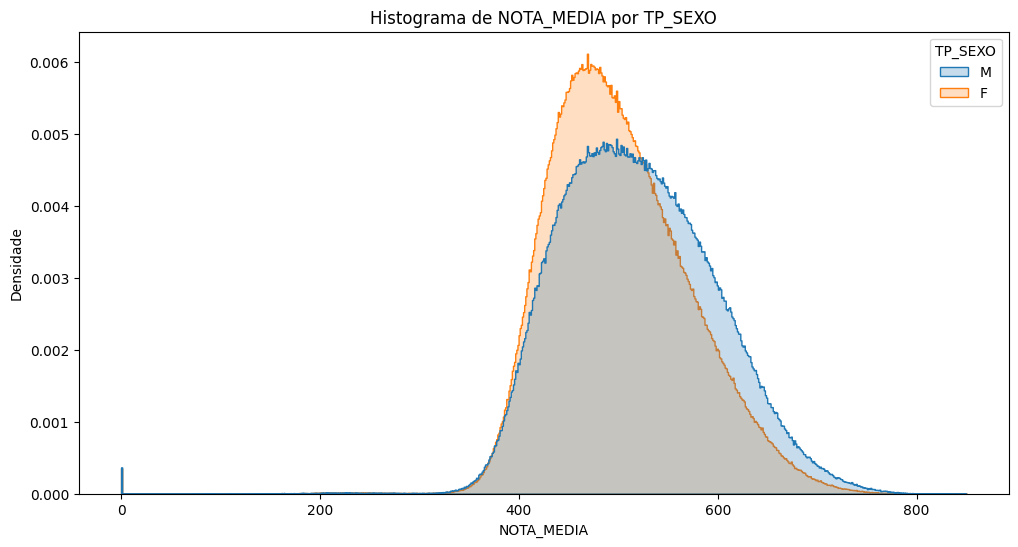

In [14]:
# Histograma de NOTA_MEDIA por TP_SEXO
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='NOTA_MEDIA', hue='TP_SEXO', element
='step', stat='density', common_norm=False)
plt.title('Histograma de NOTA_MEDIA por TP_SEXO')
plt.xlabel('NOTA_MEDIA')
plt.ylabel('Densidade')
plt.show()

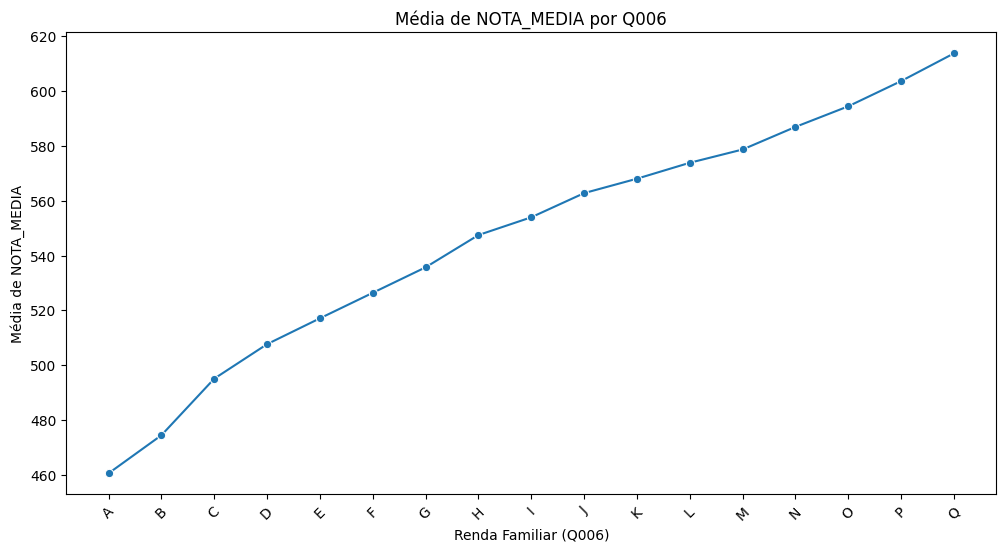

In [15]:
# Gráfico de linha da média de NOTA_MEDIA por Q006
media_por_q006 = df.groupby('Q006')['NOTA_MEDIA'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_por_q006, x='Q006', y='NOTA_MEDIA', marker='o')
plt.title('Média de NOTA_MEDIA por Q006')
plt.xlabel('Renda Familiar (Q006)')
plt.ylabel('Média de NOTA_MEDIA')
plt.xticks(rotation=45)
plt.show()

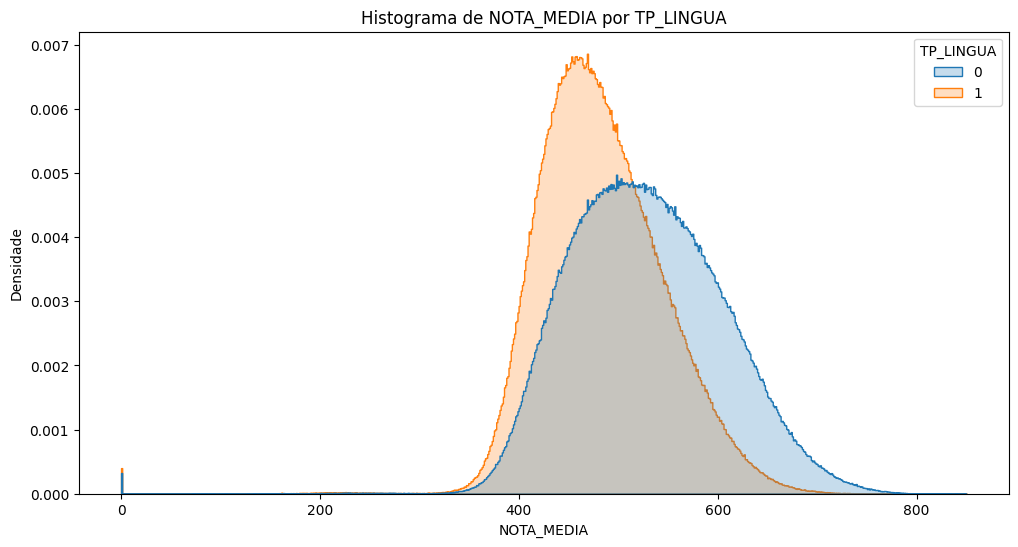

In [16]:
# Histograma de NOTA_MEDIA por TP_LINGUA
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='NOTA_MEDIA', hue='TP_LINGUA', element='step', stat='density', common_norm=False)
plt.title('Histograma de NOTA_MEDIA por TP_LINGUA')
plt.xlabel('NOTA_MEDIA')
plt.ylabel('Densidade')
plt.show()

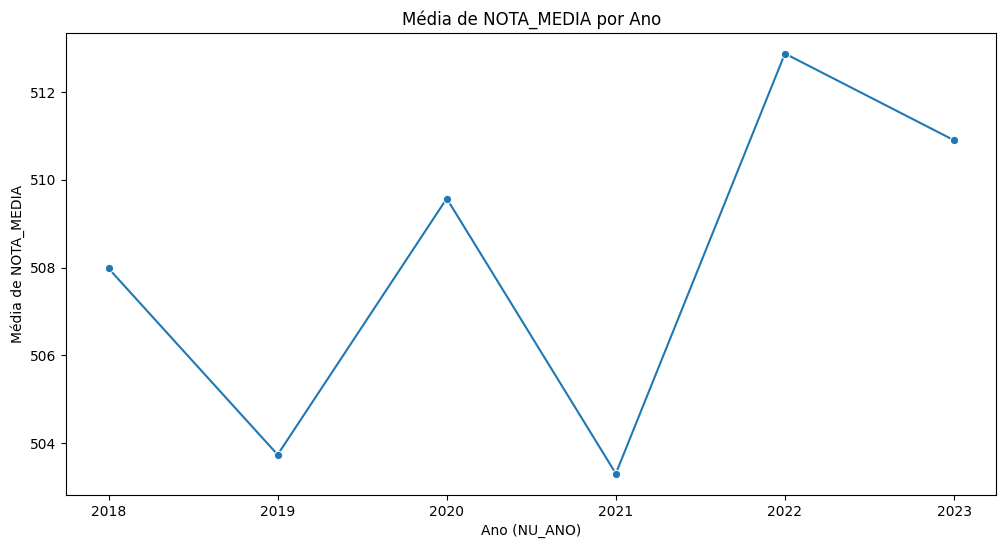

In [17]:
# Gráfico de linhas da média de NOTA_MEDIA por NU_ANO
media_por_ano = df.groupby('NU_ANO')['NOTA_MEDIA'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_por_ano, x='NU_ANO', y='NOTA_MEDIA', marker='o')
plt.title('Média de NOTA_MEDIA por Ano')
plt.xlabel('Ano (NU_ANO)')
plt.ylabel('Média de NOTA_MEDIA')
plt.xticks(media_por_ano['NU_ANO'])
plt.show()

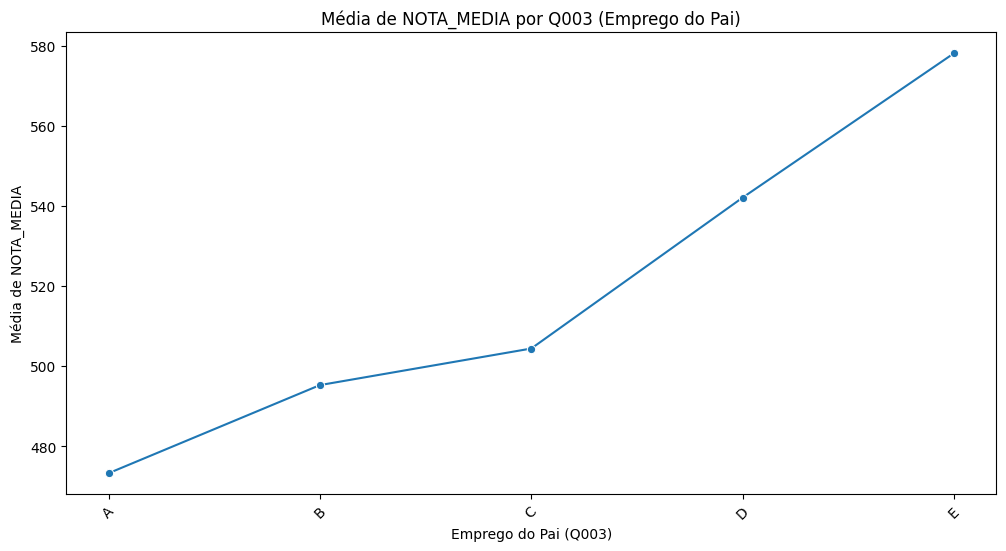

In [18]:
# Gráfico de linhas da média de NOTA_MEDIA por Q003 (Emprego do Pai), excluindo Q003 == "F" (Não sei)
df_emprego_pai = df[df['Q003'] != 'F']
media_por_q003 = df_emprego_pai.groupby('Q003')['NOTA_MEDIA'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_por_q003, x='Q003', y='NOTA_MEDIA', marker='o')
plt.title('Média de NOTA_MEDIA por Q003 (Emprego do Pai)')
plt.xlabel('Emprego do Pai (Q003)')
plt.ylabel('Média de NOTA_MEDIA')
plt.xticks(rotation=45)
plt.show()

C:\Users\szsou\AppData\Local\Temp\ipykernel_14928\878129190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q005'] = pd.to_numeric(df['Q005'], errors='coerce')


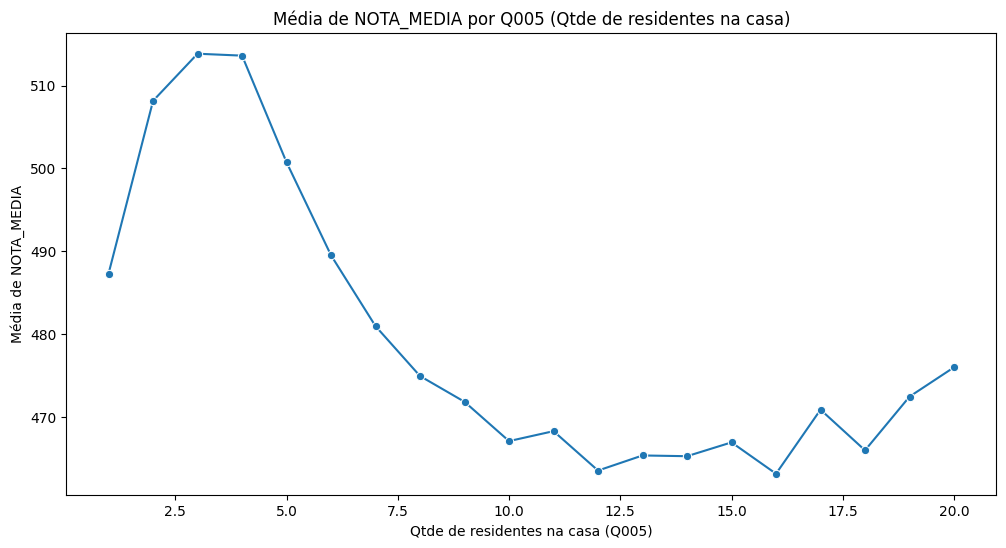

In [20]:
# Gráfico de linhas da média de NOTA_MEDIA por Q005 (Qtde de residentes na casa) - converte Q005 para inteiro
df['Q005'] = pd.to_numeric(df['Q005'], errors='coerce')
media_por_q005 = df.groupby('Q005')['NOTA_MEDIA'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_por_q005, x='Q005', y='NOTA_MEDIA', marker='o')
plt.title('Média de NOTA_MEDIA por Q005 (Qtde de residentes na casa)')
plt.xlabel('Qtde de residentes na casa (Q005)')
plt.ylabel('Média de NOTA_MEDIA')
plt.show()